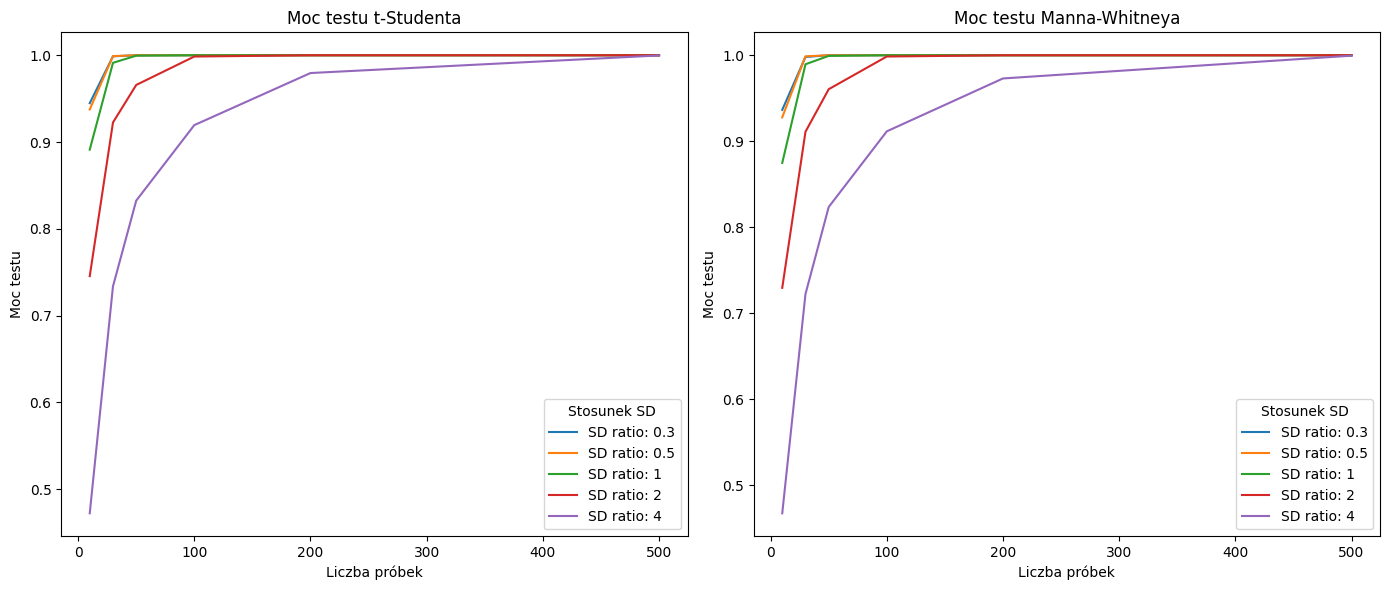

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

# Ustawienia parametrów
np.random.seed(42)  # Dla powtarzalności wyników
n_values = [10, 30, 50, 100, 200, 500]  # Liczba próbek
sd_ratios = [0.3, 0.5, 1, 2, 4]  # Stosunki odchyleń standardowych (sigma1/sigma2)
mu1 = 0  # Wartość oczekiwana dla pierwszej próby
mu2_values = [1, 2, 3, 5]  # Różne różnice w wartościach oczekiwanych (mu2 - mu1)

# Funkcja do przeprowadzania symulacji i obliczania mocy testów
def run_simulation(n, sd_ratio, mu_diff, n_simulations=1000):
    power_ttest = 0
    power_mannwhitney = 0
    
    for _ in range(n_simulations):
        sigma1 = 1  # Odchylenie standardowe pierwszej próby
        sigma2 = sigma1 * sd_ratio  # Odchylenie standardowe drugiej próby
        sample1 = np.random.normal(mu1, sigma1, n)
        sample2 = np.random.normal(mu1 + mu_diff, sigma2, n)

        # Test t-Studenta
        _, p_ttest = ttest_ind(sample1, sample2, equal_var=False)

        # Test Manna-Whitneya
        _, p_mannwhitney = mannwhitneyu(sample1, sample2)

        # Liczenie odrzuceń hipotezy zerowej (mocy)
        if p_ttest < 0.05:
            power_ttest += 1
        if p_mannwhitney < 0.05:
            power_mannwhitney += 1

    # Obliczanie mocy jako odsetek odrzuceń hipotezy
    power_ttest /= n_simulations
    power_mannwhitney /= n_simulations
    
    return power_ttest, power_mannwhitney

# Przechowywanie wyników
results_ttest = {}
results_mannwhitney = {}

# Przeprowadzanie symulacji dla różnych liczb próbek, stosunków SD i różnic wartości oczekiwanych
for n in n_values:
    for sd_ratio in sd_ratios:
        for mu_diff in mu2_values:
            power_ttest, power_mannwhitney = run_simulation(n, sd_ratio, mu_diff)
            results_ttest[(n, sd_ratio, mu_diff)] = power_ttest
            results_mannwhitney[(n, sd_ratio, mu_diff)] = power_mannwhitney

# Rysowanie wykresów z uśrednionymi wynikami
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Wykres mocy testu t-Studenta
for sd_ratio in sd_ratios:
    powers_ttest = [
        np.mean([results_ttest[(n, sd_ratio, mu_diff)] for mu_diff in mu2_values]) for n in n_values
    ]
    axes[0].plot(n_values, powers_ttest, label=f'SD ratio: {sd_ratio}')
    
axes[0].set_title('Moc testu t-Studenta')
axes[0].set_xlabel('Liczba próbek')
axes[0].set_ylabel('Moc testu')
axes[0].legend(title='Stosunek SD')

# Wykres mocy testu Manna-Whitneya
for sd_ratio in sd_ratios:
    powers_mannwhitney = [
        np.mean([results_mannwhitney[(n, sd_ratio, mu_diff)] for mu_diff in mu2_values]) for n in n_values
    ]
    axes[1].plot(n_values, powers_mannwhitney, label=f'SD ratio: {sd_ratio}')

axes[1].set_title('Moc testu Manna-Whitneya')
axes[1].set_xlabel('Liczba próbek')
axes[1].set_ylabel('Moc testu')
axes[1].legend(title='Stosunek SD')

plt.tight_layout()
plt.show()

# Wnioski:
# Test t-Studenta:
#  - Moc rośnie wyraźnie z większą liczbą próbek, zwłaszcza przy równych wariancjach (SD ratio = 1).
#  - Wraz ze wzrostem różnicy w wariancjach (np. SD ratio = 2 lub 4), moc testu t-Studenta spada, zwłaszcza przy mniejszych próbkach.
#  - Test działa najlepiej, gdy wariancje prób są zbliżone (SD ratio = 1), a moc testu rośnie znacząco przy większej liczbie próbek.
# 
# Test Manna-Whitneya:
#  - Moc testu Manna-Whitneya rośnie z większą liczbą próbek, ale jego moc jest zawsze mniejsza niż moc testu t-Studenta.
#  - Test jest bardziej odporny na różnice w wariancjach, więc jego moc pozostaje stabilna przy dużych różnicach w wariancjach (np. SD ratio = 2 lub 4).
#  - Przy małych próbkach moc testu Manna-Whitneya jest niska, ale rośnie w miarę zwiększania liczby próbek, choć nie osiąga poziomu testu t-Studenta.



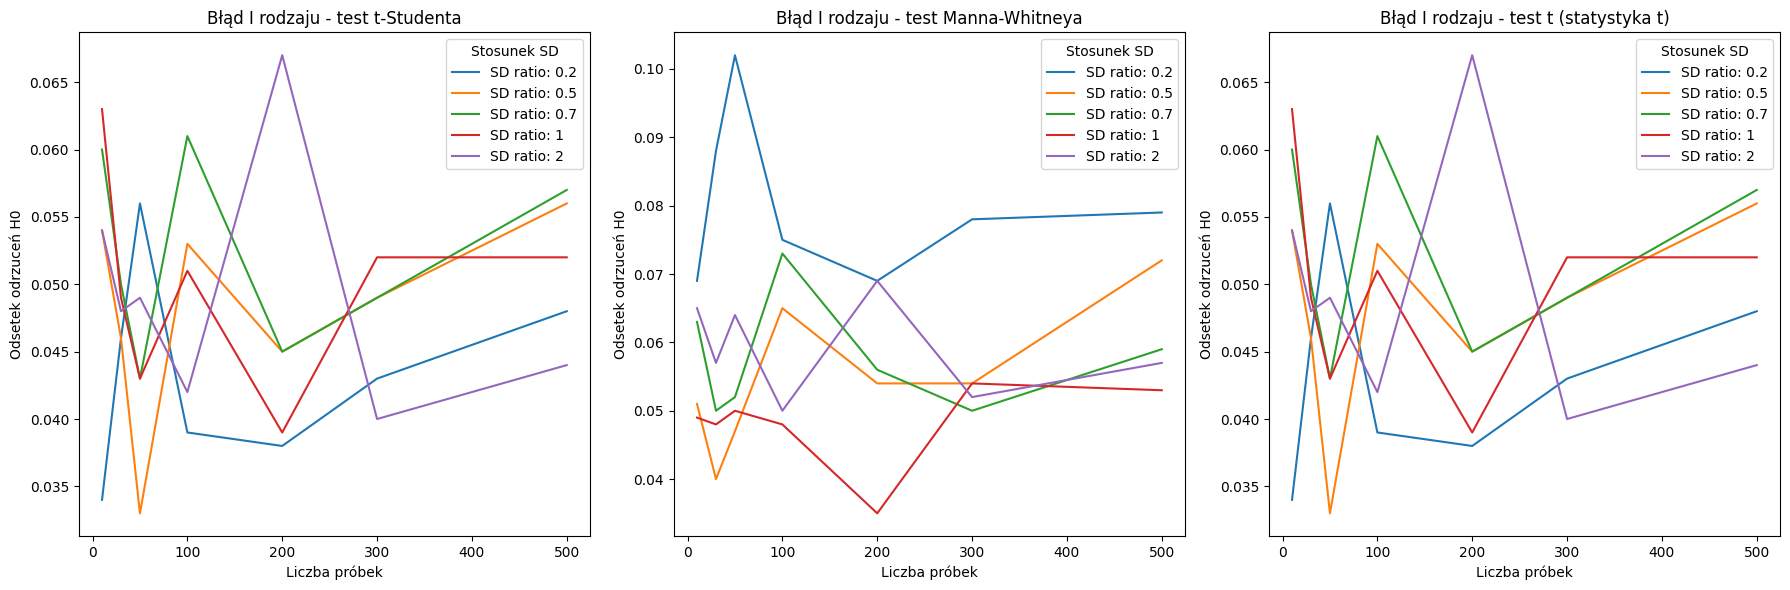

In [ ]:
# Ustawienia parametrów
np.random.seed(42)  
n_values = [10, 30, 50, 100, 200, 300, 500]  
sd_ratios = [0.2, 0.5, 0.7, 1, 2]  
mu1 = 0  
mu2 = 0  
n_simulations = 1000  

# Funkcja do obliczania błędu I rodzaju
def run_simulation_error_type(n, sd_ratio, mu1, mu2, n_simulations=1000):
    type_1_error_ttest = 0
    type_1_error_mannwhitney = 0
    type_1_error_tstat = 0
    
    for _ in range(n_simulations):
        sigma1 = 1 
        sigma2 = sigma1 * sd_ratio
        sample1 = np.random.normal(mu1, sigma1, n)
        sample2 = np.random.normal(mu2, sigma2, n)

        # Test t-Studenta
        _, p_ttest = ttest_ind(sample1, sample2, equal_var=False)

        # Test Manna-Whitneya
        _, p_mannwhitney = mannwhitneyu(sample1, sample2)

        # Test t (statystyka t)
        _, p_tstat = ttest_ind(sample1, sample2, equal_var=False)

        # Błąd I rodzaju
        if p_ttest < 0.05:
            type_1_error_ttest += 1
        if p_mannwhitney < 0.05:
            type_1_error_mannwhitney += 1
        if p_tstat < 0.05:
            type_1_error_tstat += 1

    # Odsetek odrzuceń hipotezy zerowej
    type_1_error_ttest /= n_simulations
    type_1_error_mannwhitney /= n_simulations
    type_1_error_tstat /= n_simulations
    
    return type_1_error_ttest, type_1_error_mannwhitney, type_1_error_tstat

results_ttest = {}
results_mannwhitney = {}
results_tstat = {}

# Przeprowadzanie symulacji dla różnych liczb próbek, stosunków SD i różnic wartości oczekiwanych
for n in n_values:
    for sd_ratio in sd_ratios:
        type_1_error_ttest, type_1_error_mannwhitney, type_1_error_tstat = run_simulation_error_type(
            n, sd_ratio, mu1, mu2, n_simulations
        )
        results_ttest[(n, sd_ratio)] = type_1_error_ttest
        results_mannwhitney[(n, sd_ratio)] = type_1_error_mannwhitney
        results_tstat[(n, sd_ratio)] = type_1_error_tstat

# Rysowanie wykresów błędu I rodzaju
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Wykres błędu I rodzaju testu t-Studenta
for sd_ratio in sd_ratios:
    errors_ttest = [results_ttest[(n, sd_ratio)] for n in n_values]
    axes[0].plot(n_values, errors_ttest, label=f'SD ratio: {sd_ratio}')
    
axes[0].set_title('Błąd I rodzaju - test t-Studenta')
axes[0].set_xlabel('Liczba próbek')
axes[0].set_ylabel('Odsetek odrzuceń H0')
axes[0].legend(title='Stosunek SD')

# Wykres błędu I rodzaju testu Manna-Whitneya
for sd_ratio in sd_ratios:
    errors_mannwhitney = [results_mannwhitney[(n, sd_ratio)] for n in n_values]
    axes[1].plot(n_values, errors_mannwhitney, label=f'SD ratio: {sd_ratio}')
    
axes[1].set_title('Błąd I rodzaju - test Manna-Whitneya')
axes[1].set_xlabel('Liczba próbek')
axes[1].set_ylabel('Odsetek odrzuceń H0')
axes[1].legend(title='Stosunek SD')

# Wykres błędu I rodzaju testu t (statystyka t)
for sd_ratio in sd_ratios:
    errors_tstat = [results_tstat[(n, sd_ratio)] for n in n_values]
    axes[2].plot(n_values, errors_tstat, label=f'SD ratio: {sd_ratio}')
    
axes[2].set_title('Błąd I rodzaju - test t (statystyka t)')
axes[2].set_xlabel('Liczba próbek')
axes[2].set_ylabel('Odsetek odrzuceń H0')
axes[2].legend(title='Stosunek SD')

plt.tight_layout()
plt.show()

# Wnioski:
# Test t-Studenta:
#  - Błąd I rodzaju rośnie z większą liczbą próbek, ale jest wyższy, gdy stosunek SD jest większy.
#  - Przy mniejszych różnicach w wariancjach, błąd I rodzaju jest mniejszy, szczególnie przy większej liczbie próbek.
#  - Test t-Studenta ma tendencję do większych wartości błędu I rodzaju przy mniejszych próbkach i dużych różnicach w wariancjach.

# Test Manna-Whitneya:
#  - Błąd I rodzaju jest stosunkowo stabilny, ale rośnie przy większych różnicach w wariancjach.
#  - Test Manna-Whitneya wykazuje wyższy błąd I rodzaju przy mniejszych próbkach, zwłaszcza przy większych stosunkach SD.
#  - W przypadku dużych próbek błąd I rodzaju zmniejsza się, ale nadal jest wyższy w przypadku dużych różnic w wariancjach.

# 3. Test t (statystyka t):
#  - Zachowanie testu t jest zbliżone do testu t-Studenta, z wyższymi wartościami błędu I rodzaju przy większych różnicach w wariancjach.
#  - Test t wykazuje podobne tendencje jak test t-Studenta, zwłaszcza przy dużych próbkach, gdzie błąd I rodzaju maleje.
#  - Test t i t-Studenta mają zbliżone wyniki, ale różnice w wariancjach wpływają na ich moc i błąd I rodzaju.


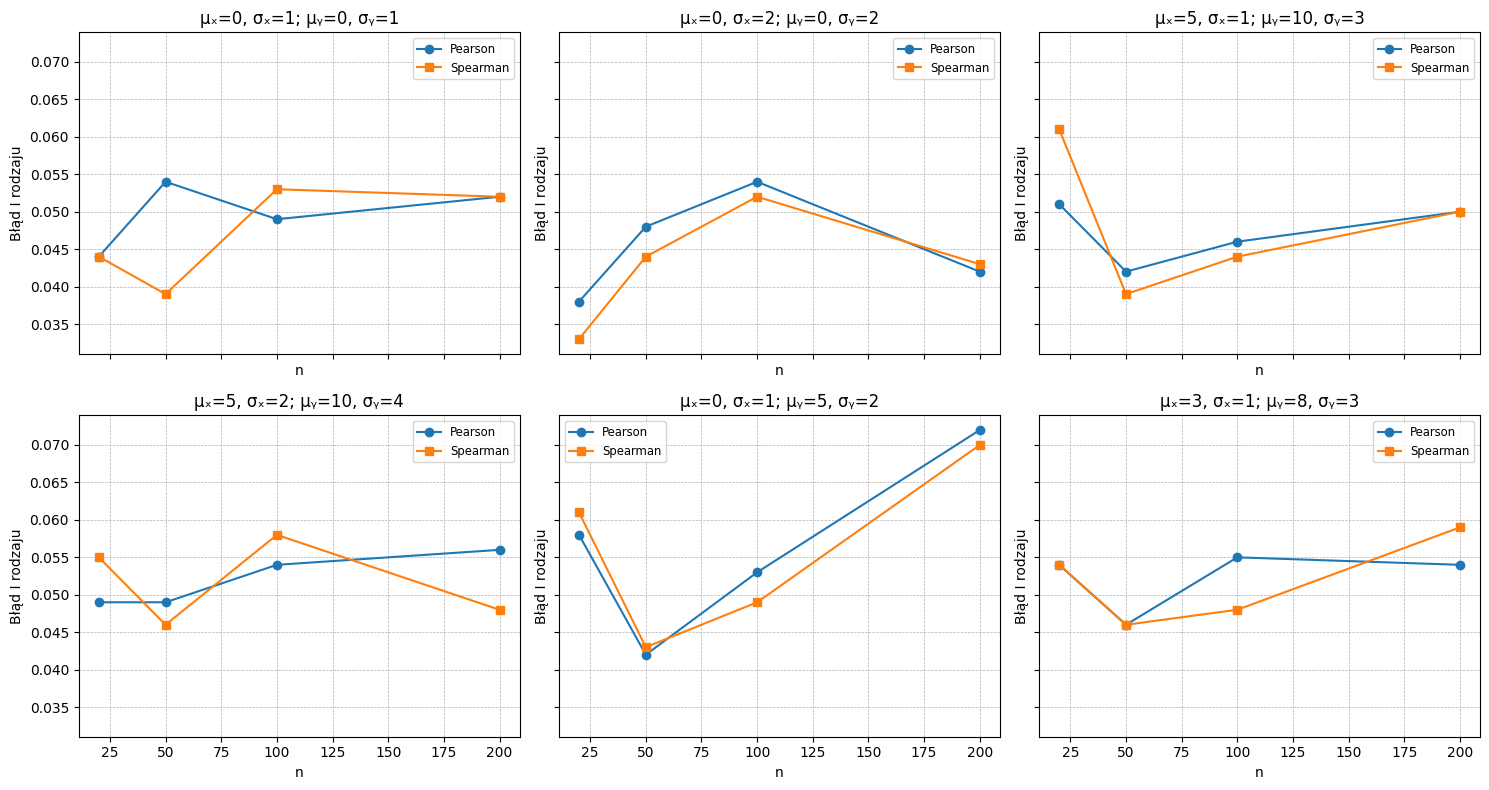

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Ustawienia symulacji
rng = np.random.default_rng(42)
sample_sizes = [20, 50, 100, 200]
params = [
    (0, 1, 0, 1),
    (0, 2, 0, 2),
    (5, 1, 10, 3),
    (5, 2, 10, 4),
    (0, 1, 5, 2),
    (3, 1, 8, 3),
]

def simulate_type1(n, mean_x, sd_x, mean_y, sd_y, alpha=0.05, replicates=1000):
    pearson_rejects = 0
    spearman_rejects = 0
    for _ in range(replicates):
        x = rng.normal(mean_x, sd_x, n)
        y = rng.normal(mean_y, sd_y, n)
        pearson_rejects += (pearsonr(x, y)[1] < alpha)
        spearman_rejects += (spearmanr(x, y)[1] < alpha)
    return pearson_rejects / replicates, spearman_rejects / replicates

# Zbieranie wyników
results = []
for n in sample_sizes:
    for mean_x, sd_x, mean_y, sd_y in params:
        p_err, s_err = simulate_type1(n, mean_x, sd_x, mean_y, sd_y)
        results.append({
            'n': n,
            'mean_x': mean_x,
            'sd_x': sd_x,
            'mean_y': mean_y,
            'sd_y': sd_y,
            'pearson_type1': p_err,
            'spearman_type1': s_err
        })

df = pd.DataFrame(results)

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (mean_x, sd_x, mean_y, sd_y) in zip(axes, params):
    subset = df[
        (df['mean_x'] == mean_x) &
        (df['sd_x'] == sd_x) &
        (df['mean_y'] == mean_y) &
        (df['sd_y'] == sd_y)
    ]
    ax.plot(subset['n'], subset['pearson_type1'], marker='o', label='Pearson')
    ax.plot(subset['n'], subset['spearman_type1'], marker='s', label='Spearman')
    ax.set_title(f'μₓ={mean_x}, σₓ={sd_x}; μᵧ={mean_y}, σᵧ={sd_y}')
    ax.set_xlabel('n')
    ax.set_ylabel('Błąd I rodzaju')
    ax.grid(linestyle='--', linewidth=0.5)
    ax.legend(fontsize='small')

plt.tight_layout()
plt.show()

# Wnioski:
# Przy standardowych parametrach oba testy utrzymują się blisko nominalnego poziomu alfa=0.05, nawet dla n=20,50.
# Zwiększona wariancja powoduje większe odchylenia przy małych próbach, ale przy n>=100 oba testy się stabilizują.
# Dla niestandardowych średnich i małych n test Spearmana bywa bardziej zmienny (częściej przekracza 0.05) niż test Pearsona.
# Generalnie: 
#  - Dla małych prób warto porównać oba testy,
#  - Przy dużych próbach (n>=100) oba zachowują poziom błędu I rodzaju zgodnie z założeniem.


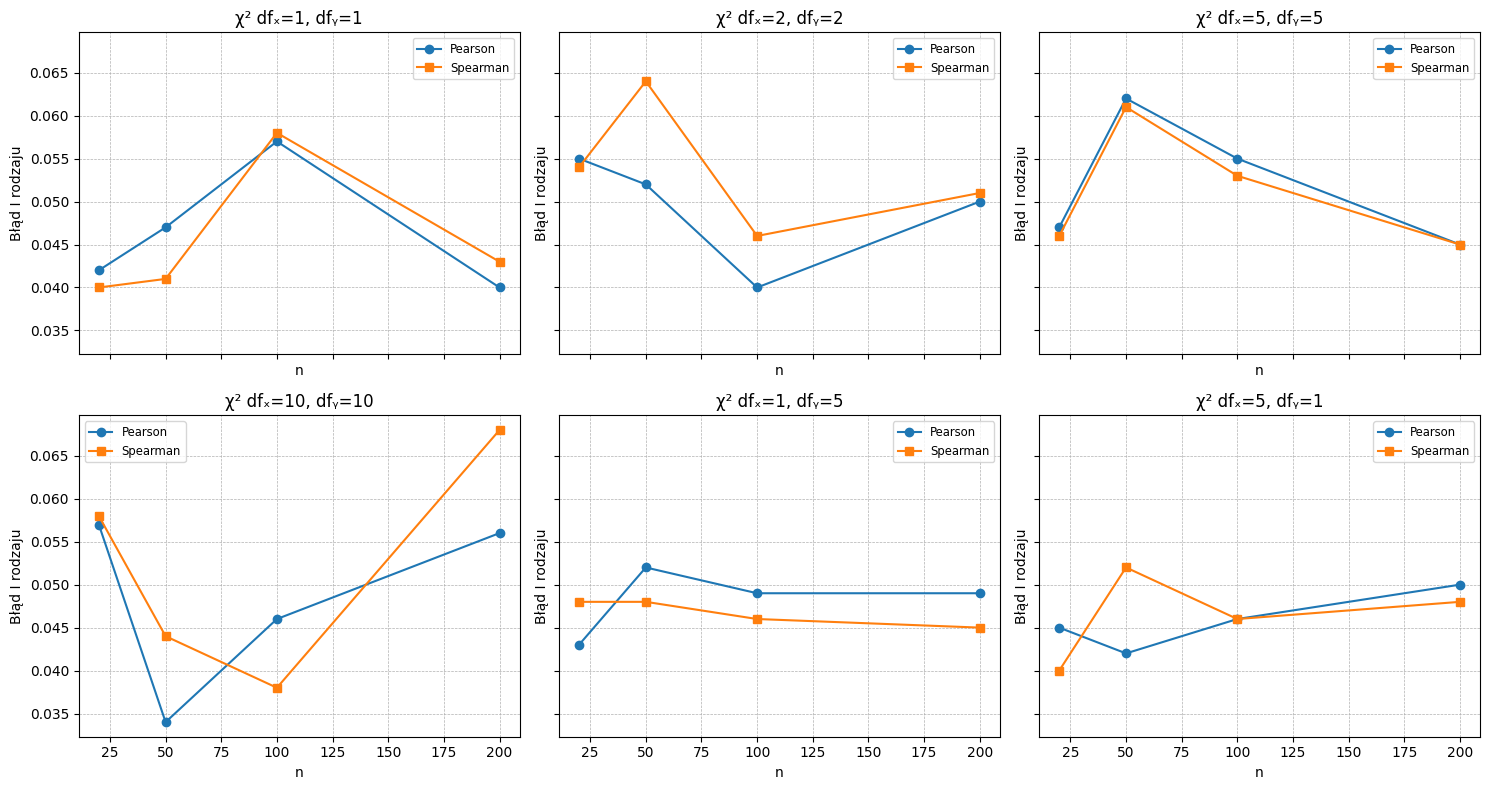

In [6]:
# Symulacja błędu I rodzaju dla danych z rozkładów χ²
rng = np.random.default_rng(123)
sample_sizes = [20, 50, 100, 200]
# 6 zestawów stopni swobody: (df_x, df_y)
params = [
    (1, 1),
    (2, 2),
    (5, 5),
    (10, 10),
    (1, 5),
    (5, 1),
]

def simulate_type1_chi2(n, df_x, df_y, alpha=0.05, replicates=1000):
    pearson_rejects = 0
    spearman_rejects = 0
    for _ in range(replicates):
        x = rng.chisquare(df_x, size=n)
        y = rng.chisquare(df_y, size=n)
        pearson_rejects += (pearsonr(x, y)[1] < alpha)
        spearman_rejects += (spearmanr(x, y)[1] < alpha)
    return pearson_rejects / replicates, spearman_rejects / replicates

# Zbieranie wyników
results = []
for n in sample_sizes:
    for df_x, df_y in params:
        p_err, s_err = simulate_type1_chi2(n, df_x, df_y)
        results.append({
            'n': n,
            'df_x': df_x,
            'df_y': df_y,
            'pearson_type1': p_err,
            'spearman_type1': s_err
        })

df = pd.DataFrame(results)

# Wykresy
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (df_x, df_y) in zip(axes, params):
    subset = df[(df['df_x'] == df_x) & (df['df_y'] == df_y)]
    ax.plot(subset['n'], subset['pearson_type1'], marker='o', label='Pearson')
    ax.plot(subset['n'], subset['spearman_type1'], marker='s', label='Spearman')
    ax.set_title(f'χ² dfₓ={df_x}, dfᵧ={df_y}')
    ax.set_xlabel('n')
    ax.set_ylabel('Błąd I rodzaju')
    ax.grid(linestyle='--', linewidth=0.5)
    ax.legend(fontsize='small')

plt.tight_layout()
plt.show()

# Wnioski:
# Przy bardzo małych df oba testy wykazują dużą zmienność odsetka błędu I rodzaju dla małych prób.
# Wraz ze wzrostem df rozkład chi2 staje się bardziej symetryczny, a oba testy zbliżają się do nominalnego poziomu alfa=0.05 już dla n>=100.
# Test Spearmana bywa nieco bardziej konserwatywny przy silnie skośnych rozkładach (niska df), ale też bardziej zmienny.
